# References

**Image Data Generator** - https://towardsdatascience.com/image-data-generators-in-keras-7c5fc6928400

**Image Recognition with Transfer Learning** - https://thedatafrog.com/en/articles/image-recognition-transfer-learning/ 

**Base Model** https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

**VGG16 Transfer Learning** - https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/#:~:text=In%20the%202014%20ImageNet%20Classification,present%20in%20our%20Food%20dataset.

**VGG16 Architecture** - https://neurohive.io/en/popular-networks/vgg16/

**Dataset** (collection of observations on animals such as tracks, sightings, etc. uploaded by the users)- https://www.inaturalist.org/observations?taxon_id=41636



# Import Required Libraries

In [1]:
import tensorflow
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import cv2
import os

from PIL import Image
from skimage import io
from matplotlib.pyplot import figure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix

vgg16 = tensorflow.keras.applications.vgg16

**Dataset**

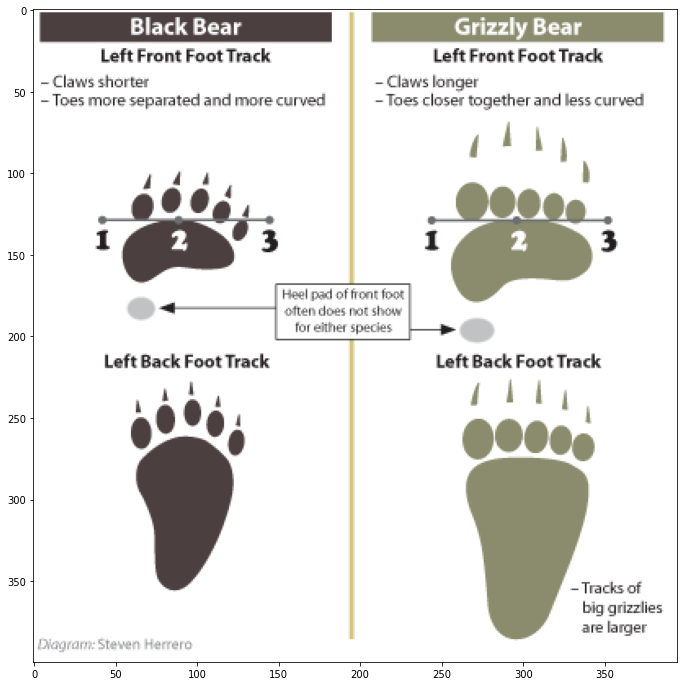

Source: http://westernwildlife.org/grizzly-bear-outreach-project/bear-identification/


In [2]:
figure(figsize=(12,12))
plt.imshow(img.imread('dataset/beartrack_id.png'))
plt.show()
print("Source: http://westernwildlife.org/grizzly-bear-outreach-project/bear-identification/")

Sample of Black Bear footprint


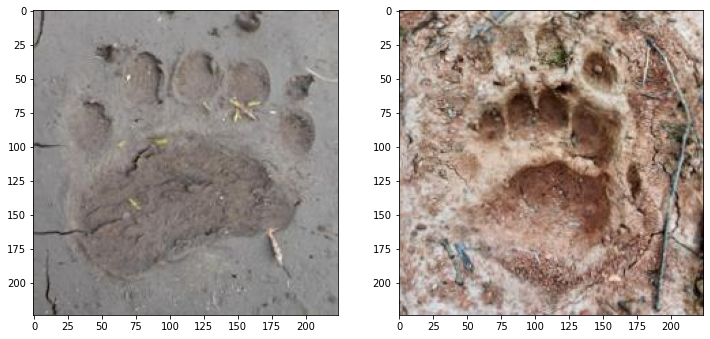

In [3]:
print("Sample of Black Bear footprint")
figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img.imread('dataset/black/aug_4_3612.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('dataset/black/aug_9_1684.jpg'))

Sample of Grizzly Bear footprint


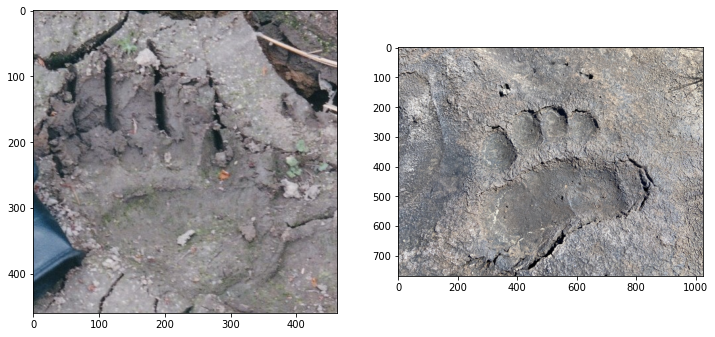

In [4]:
print("Sample of Grizzly Bear footprint")
figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img.imread('dataset/grizzly/large (9).jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('dataset/grizzly/large (4).jpg'))



**Data Augmentation Setting**


In [5]:
datagen = ImageDataGenerator(
            rotation_range=30,         #rotate
            width_shift_range=0.2,     #Moves left or right
            height_shift_range=0.2,    #moves up or down
            horizontal_flip=True,      #flips image
            fill_mode='constant')

**Data Augmentation function**

increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data

In [6]:
def Augment_data(image_path, save_to_path, data_size, no_of_generation):
    image_directory = image_path
    SIZE = 224
    dataset = []

    my_images = os.listdir(image_directory)
    for i, image_name in enumerate(my_images):
        if (image_name.split('.')[1] == 'jpg'):
            image = io.imread(image_directory + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE,SIZE))
            dataset.append(np.array(image))

    x = np.array(dataset)

    i = 0
    for batch in datagen.flow(x, batch_size=data_size,  
                              save_to_dir=save_to_path, 
                              save_prefix='aug', 
                              save_format='jpg'):
        i += 1
        if i > no_of_generation-1:
            break

**black bear train set**

In [ ]:
Augment_data('train/black/', 
             r'C:\Users\RAZER-MERCURY\Documents\school(3Y3T)\Artificial Intelligence 4\project\train\black', 
             68, 
             20)

**grizzly bear train set**

In [ ]:
Augment_data('train/grizzly/', 
             r'C:\Users\RAZER-MERCURY\Documents\school(3Y3T)\Artificial Intelligence 4\project\train\grizzly', 
             68,
             20)

**black bear test set**

In [ ]:
Augment_data('test/black/', 
             r'C:\Users\RAZER-MERCURY\Documents\school(3Y3T)\Artificial Intelligence 4\project\test\black', 
             18, 
             20)

**grizzly bear test set**

In [ ]:
Augment_data('test/grizzly/', 
             r'C:\Users\RAZER-MERCURY\Documents\school(3Y3T)\Artificial Intelligence 4\project\test\grizzly', 
             18, 
             20)

# Load Data

In [7]:
labels = ['black', 'grizzly']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Visualize the data 

In [8]:
train = get_data('train') 
val = get_data('test')

#these folders contains black and grizzly folders

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

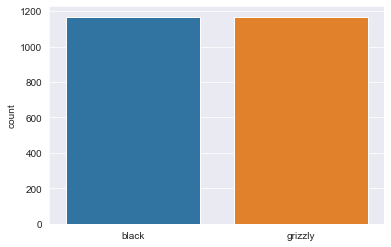

In [9]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("black")
    else:
        l.append("grizzly")
sns.set_style('darkgrid')
sns.countplot(l)

In [10]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

# Define the Model

In [11]:
base_model = Sequential()
base_model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
base_model.add(MaxPool2D())

base_model.add(Conv2D(32, 3, padding="same", activation="relu"))
base_model.add(MaxPool2D())

base_model.add(Conv2D(64, 3, padding="same", activation="relu"))
base_model.add(MaxPool2D())
base_model.add(Dropout(0.4))

base_model.add(Flatten())
base_model.add(Dense(128,activation="relu"))
base_model.add(Dense(2, activation="softmax"))

base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [14]:
opt = Adam(lr=0.00001)
base_model.compile(optimizer = opt , loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['acc'])

In [15]:
history = base_model.fit(x_train,y_train, epochs = 128 , validation_data = (x_val, y_val))

Train on 2336 samples, validate on 592 samples
Epoch 1/128
2336/2336 [==============================] - 6s 3ms/sample - loss: 0.6932 - acc: 0.5103 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.6855 - acc: 0.5595 - val_loss: 0.6965 - val_acc: 0.4865
Epoch 3/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.6743 - acc: 0.5938 - val_loss: 0.6983 - val_acc: 0.4916
Epoch 4/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.6616 - acc: 0.6173 - val_loss: 0.6969 - val_acc: 0.5304
Epoch 5/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.6512 - acc: 0.6485 - val_loss: 0.6883 - val_acc: 0.5507
Epoch 6/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.6410 - acc: 0.6648 - val_loss: 0.6775 - val_acc: 0.5794
Epoch 7/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.6308 - acc: 0.6866 - val_loss: 0.6696 - val_acc: 0

Epoch 60/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4220 - acc: 0.9294 - val_loss: 0.5434 - val_acc: 0.7534
Epoch 61/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4203 - acc: 0.9332 - val_loss: 0.5350 - val_acc: 0.7601
Epoch 62/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4174 - acc: 0.9349 - val_loss: 0.5499 - val_acc: 0.7432
Epoch 63/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4140 - acc: 0.9362 - val_loss: 0.5476 - val_acc: 0.7449
Epoch 64/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4157 - acc: 0.9388 - val_loss: 0.5389 - val_acc: 0.7551
Epoch 65/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4134 - acc: 0.9384 - val_loss: 0.5351 - val_acc: 0.7584
Epoch 66/128
2336/2336 [==============================] - 4s 2ms/sample - loss: 0.4129 - acc: 0.9362 - val_loss: 0.5346 - val_acc: 0.7635
Epoch 67/128
2336/2336 [==========

# Results

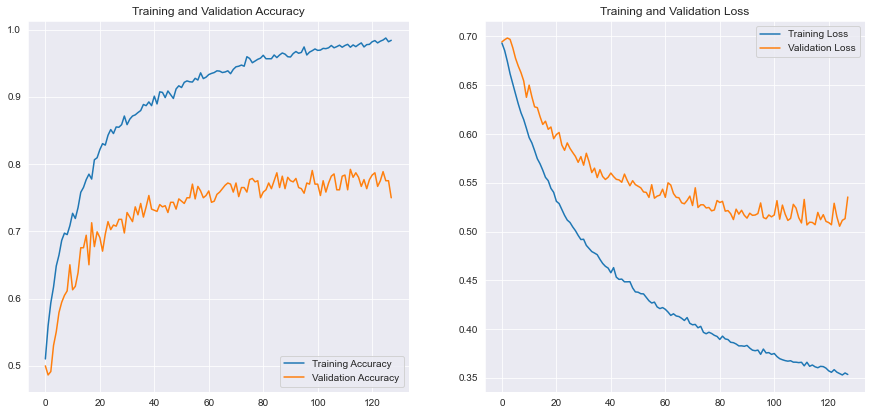

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
predictions = base_model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Black Bear (Class 0)','Grizzly Bear (Class 1)']))

                        precision    recall  f1-score   support

  Black Bear (Class 0)       0.71      0.86      0.77       296
Grizzly Bear (Class 1)       0.82      0.64      0.72       296

              accuracy                           0.75       592
             macro avg       0.76      0.75      0.75       592
          weighted avg       0.76      0.75      0.75       592



# 2) Transfer Learning

**Data augmentation**

Using data-augmentation in order to provide enough data to our model, avoiding overfitting

In [19]:
#instantiate ImageDataGenerator which handles the parameter on preprocessing and transformation of the  images

imgdatagen = ImageDataGenerator(
    preprocessing_function=vgg16.preprocess_input, #since we are using vgg16 as our model, we also use its proprocessing
    horizontal_flip=True,     #flips image
    rotation_range=30,        #rotate
    width_shift_range=0.2,    #moves left or right
    height_shift_range=0.1,   #moves up or down
    validation_split = 0.2,   #divide train and test
)

In [20]:

datasetdir = 'dataset'
os.chdir(datasetdir)

#VGG16 model accept an input shape of (224,224,3)
shape = (224,224)
batch_size = 8

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = shape, 
    batch_size = batch_size,
    subset = 'training',
    shuffle = True,
    seed=42
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = shape, 
    batch_size = batch_size,
    subset = 'validation',
    shuffle = True,
    seed=42
)

test_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size=(224, 224),
    class_mode=None,
    batch_size=1,
    shuffle = False,
    seed=42)

print("")
print("Class names are", ' and '.join([str(x) for x in train_dataset.class_indices]))
print("")
print("Sample per class in train dataset:", int(train_dataset.samples/len(train_dataset.class_indices)))
print("Sample per class in val dataset:", int(val_dataset.samples/len(val_dataset.class_indices)))
print("")


#the output corresponds to (batch_size, height, width, number of channels)
x,y = next(train_dataset)
print(x.shape)

#we have batch size of 8 which results to have minibatches per epoch (sample/batchsize = number of data trained per epoch)
#224x224 as we resize it to fit in the model
#3 since it is an rgb channel

Found 138 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
Found 172 images belonging to 2 classes.

Class names are black and grizzly

Sample per class in train dataset: 69
Sample per class in val dataset: 17

(8, 224, 224, 3)


Sample augmented images from train_dataset


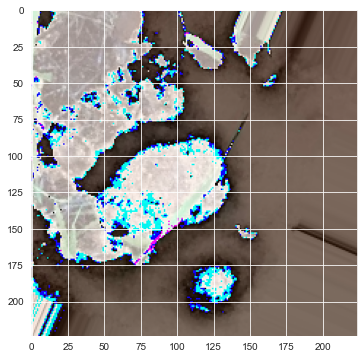

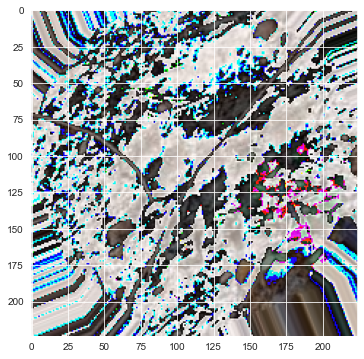

In [21]:
print("Sample augmented images from train_dataset")

x,y = train_dataset.next()
for i in range(0,2):
    image = x[i]
    figure(figsize=(6,6))
    plt.imshow(image.astype('uint8'))
    plt.show()

#the sample image is already preprocessed and transformed using the parameters in ImageDataGenerator

**Model Architecture**

**VGG16** is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

Source: https://neurohive.io/en/popular-networks/vgg16/

In [22]:
#instantiate the vgg16 model with  weights pre-trained from imagenet
#add input shape which matches our dataset

conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# flatten the output of the convolutional part
x = keras.layers.Flatten()(conv_model.output)

# add two hidden layers to act as feature extractor
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)

#adding dropout layer to reduce overfitting
x = keras.layers.Dropout(0.2)(x)

# two neurons since we have two classes and sigmoid activation for output layer 
predictions = keras.layers.Dense(2, activation='sigmoid')(x)

# compile model
bear_foot_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)

#setting the vgg16 to not be trainable so we dont change its weight
for layer in conv_model.layers:
    layer.trainable = False

bear_foot_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Model Training**

In [23]:
#we use binary_crossentropy since we are classifying two classes, and Adam for our optimizer with the learning rate of 0.001
bear_foot_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=0.0001),
                  metrics=['acc'])

#fit_generator is used in order to fit the images produced from the ImageDataGenerator
history = bear_foot_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=128,
)

#save the model
bear_foot_model.save_weights('custom_vgg16.h5')

Epoch 1/128
18/18 [==============================] - 8s 424ms/step - loss: 2.2338 - acc: 0.4819 - val_loss: 1.4857 - val_acc: 0.5441
Epoch 2/128
18/18 [==============================] - 3s 190ms/step - loss: 1.2642 - acc: 0.6449 - val_loss: 1.7921 - val_acc: 0.4412
Epoch 3/128
18/18 [==============================] - 4s 197ms/step - loss: 1.2069 - acc: 0.5906 - val_loss: 1.0055 - val_acc: 0.6324
Epoch 4/128
18/18 [==============================] - 4s 203ms/step - loss: 0.8335 - acc: 0.6812 - val_loss: 0.8472 - val_acc: 0.6471
Epoch 5/128
18/18 [==============================] - 4s 198ms/step - loss: 0.7684 - acc: 0.6739 - val_loss: 0.7337 - val_acc: 0.6618
Epoch 6/128
18/18 [==============================] - 4s 212ms/step - loss: 0.7827 - acc: 0.6957 - val_loss: 0.8182 - val_acc: 0.6176
Epoch 7/128
18/18 [==============================] - 4s 201ms/step - loss: 0.7503 - acc: 0.7754 - val_loss: 0.5367 - val_acc: 0.7059
Epoch 8/128
18/18 [==============================] - 3s 193ms/step - 

18/18 [==============================] - 5s 303ms/step - loss: 0.0150 - acc: 0.9964 - val_loss: 0.1041 - val_acc: 0.9412
Epoch 124/128
18/18 [==============================] - 5s 264ms/step - loss: 0.0285 - acc: 0.9964 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 125/128
18/18 [==============================] - 5s 269ms/step - loss: 0.2387 - acc: 0.9565 - val_loss: 0.3517 - val_acc: 0.9118
Epoch 126/128
18/18 [==============================] - 4s 248ms/step - loss: 0.0392 - acc: 0.9891 - val_loss: 0.1234 - val_acc: 0.9412
Epoch 127/128
18/18 [==============================] - 5s 268ms/step - loss: 0.0797 - acc: 0.9638 - val_loss: 0.0792 - val_acc: 0.9559
Epoch 128/128
18/18 [==============================] - 5s 272ms/step - loss: 0.1106 - acc: 0.9710 - val_loss: 0.1573 - val_acc: 0.9118


**Model Evaluation**

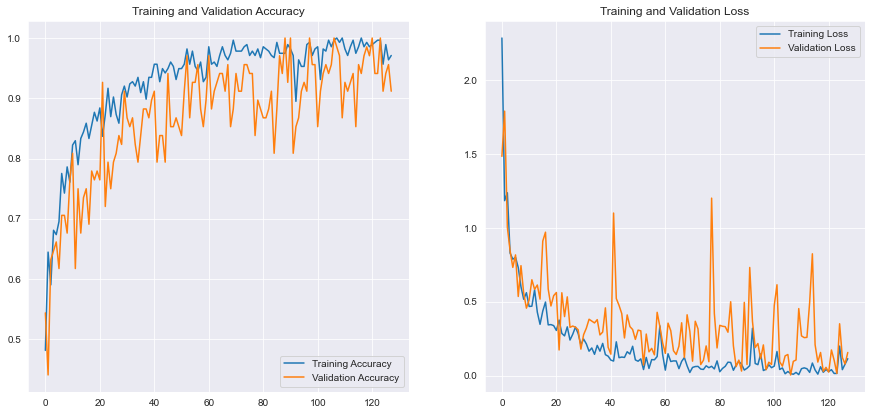

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
true_classes = test_dataset.classes
class_indices = train_dataset.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = bear_foot_model.predict(test_dataset)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("Bear Footprint Classification using VGG16: {:.2f}%".format(vgg_acc * 100))

Bear Footprint Classification using VGG16: 98.84%


**Image Predictions**

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def predict_bear_footprint(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    plt.imshow(img)

    print(bear_foot_model.predict(x))
    
    for x in bear_foot_model.predict(x):
        for i in range(len(x)):
            if(i==0):
                print("Black Bear Confidence: ", end = " ")
            else:
                print("Grizzly Bear Confidence: ", end = " ")
            print("{0:.2%}".format(x[i]))

[[1.0000000e+00 1.6503463e-07]]
Black Bear Confidence:  100.00%
Grizzly Bear Confidence:  0.00%


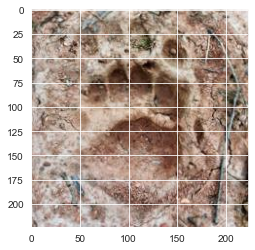

In [27]:
predict_bear_footprint('black/aug_9_1684.jpg')

[[0. 1.]]
Black Bear Confidence:  0.00%
Grizzly Bear Confidence:  100.00%


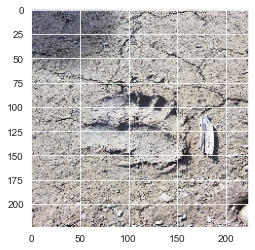

In [28]:
predict_bear_footprint('grizzly/large (25).jpg')

[[9.997819e-01 1.670952e-06]]
Black Bear Confidence:  99.98%
Grizzly Bear Confidence:  0.00%


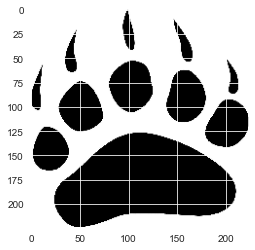

In [29]:
predict_bear_footprint('black_google.jpg')

[[2.3745839e-04 9.8778188e-01]]
Black Bear Confidence:  0.02%
Grizzly Bear Confidence:  98.78%


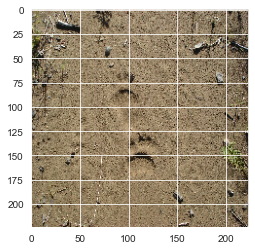

In [30]:
predict_bear_footprint('black_google_2.jpg')

[[1.8583019e-05 9.9994373e-01]]
Black Bear Confidence:  0.00%
Grizzly Bear Confidence:  99.99%


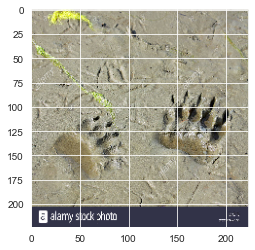

In [31]:
predict_bear_footprint('grizzly_google.jpg')

[[4.804680e-07 9.999999e-01]]
Black Bear Confidence:  0.00%
Grizzly Bear Confidence:  100.00%


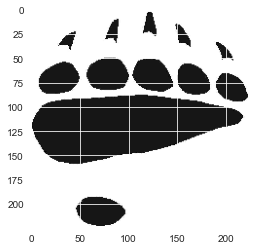

In [32]:
predict_bear_footprint('grizzly_google_2.jpg')